In [1]:
%pylab notebook
import bfm_simulator as bfm
import time

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


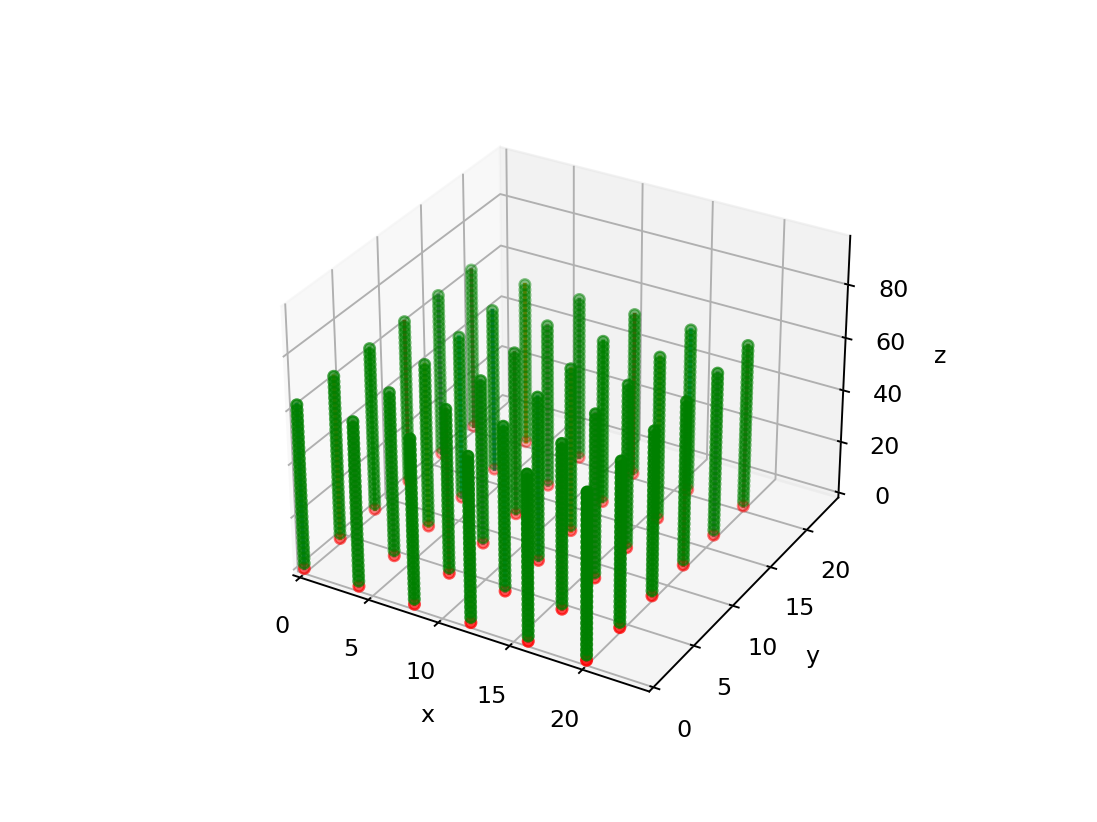

<IPython.core.display.Javascript object>


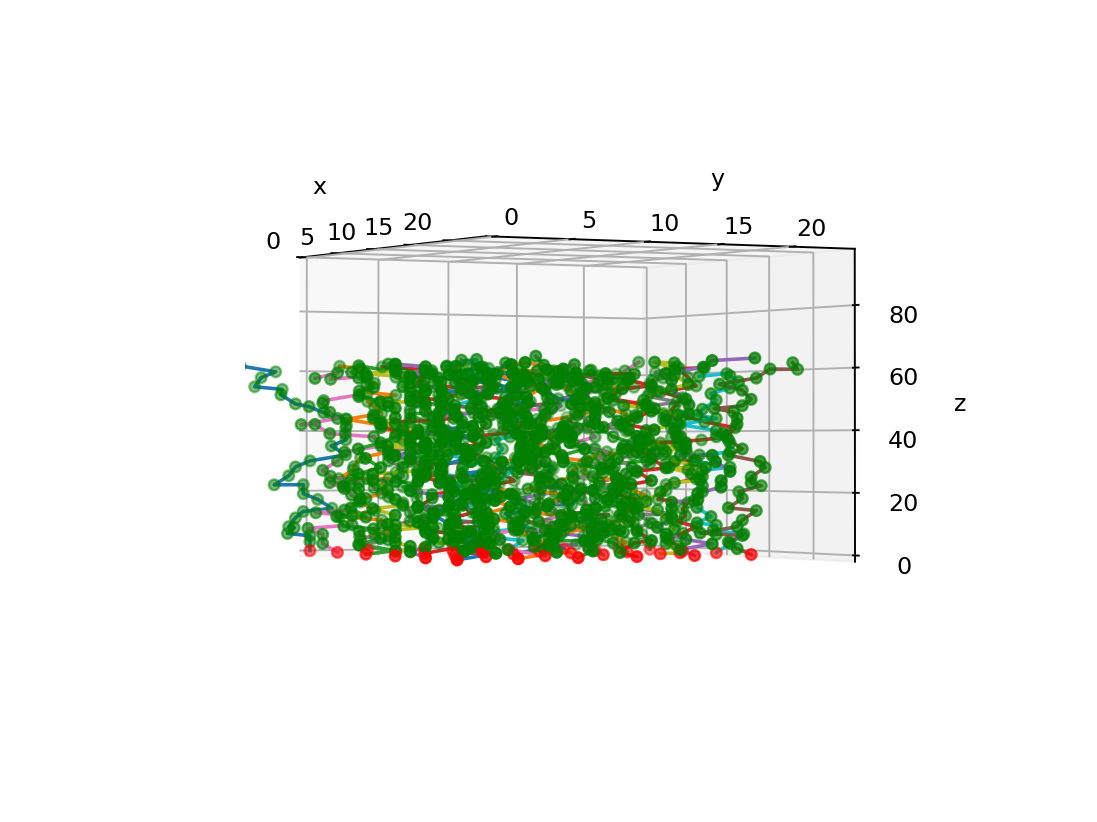

In [4]:
# grafting densities 1/9, 1/16, 1/25
sigmaInv = 16
# Kettenlängen 32, ?
N = 32
# ketten array csp = 8x8 ? -> dauert ganz schön lange... besser 6x6?
nChainsPerDirection = 6

# ab hier wird alles aus den obigen Parametern berechnet:
'''----------------------------------------------------------'''
distanceInXYDirection = int(np.sqrt(sigmaInv))
distanceInZ = 2
myBoxXY = nChainsPerDirection*distanceInXYDirection

# setup Simulator
hugo = bfm.BFMSimulator( [myBoxXY,myBoxXY,N*3], [True, True, False] )

for dx in range(nChainsPerDirection):
    for dy in range(nChainsPerDirection):
        for z in range(N):
            coords = np.array([dx*distanceInXYDirection,dy*distanceInXYDirection,z*distanceInZ])
            if (z==0):
                attr = {"fixed": True}
            else:
                attr = {"fixed": False}
            hugo.addMonomer(coords,attr)
            if not z==0:
                hugo.connectMonomers(len(hugo.molecules)-2,len(hugo.molecules)-1)
                
hugo.checkConfig()
hugo.plotConfig()
hugo.performMCS(100)
hugo.plotConfig()

In [5]:
def createBrush(invSigma, N, nChainsPerDirection):
    
    # ketten array csp = 8x8 ? -> dauert ganz schön lange... besser 6x6?
    # nChainsPerDirection = 5

    # ab hier wird alles aus den obigen Parametern berechnet:
    '''----------------------------------------------------------'''
    distanceInXYDirection = int(np.sqrt(invSigma))
    distanceInZ = 2
    myBoxXY = nChainsPerDirection*distanceInXYDirection
    print(invSigma, distanceInXYDirection, myBoxXY)

    # setup Simulator
    hugo = bfm.BFMSimulator( [myBoxXY,myBoxXY,N*3], [True, True, False] )

    for dx in range(nChainsPerDirection):
        for dy in range(nChainsPerDirection):
            for z in range(N):
                coords = np.array([dx*distanceInXYDirection,dy*distanceInXYDirection,z*distanceInZ])
                if (z==0):
                    attr = {"fixed": True}
                else:
                    attr = {"fixed": False}
                hugo.addMonomer(coords,attr)
                if not z==0:
                    hugo.connectMonomers(len(hugo.molecules)-2,len(hugo.molecules)-1)

    hugo.checkConfig()
    return hugo

144 12 12
applied moves / attempted moves:
78698 / 320000 = 0.24593125
single chain 10000 39.0 0.0 [-3  1 39]


<IPython.core.display.Javascript object>


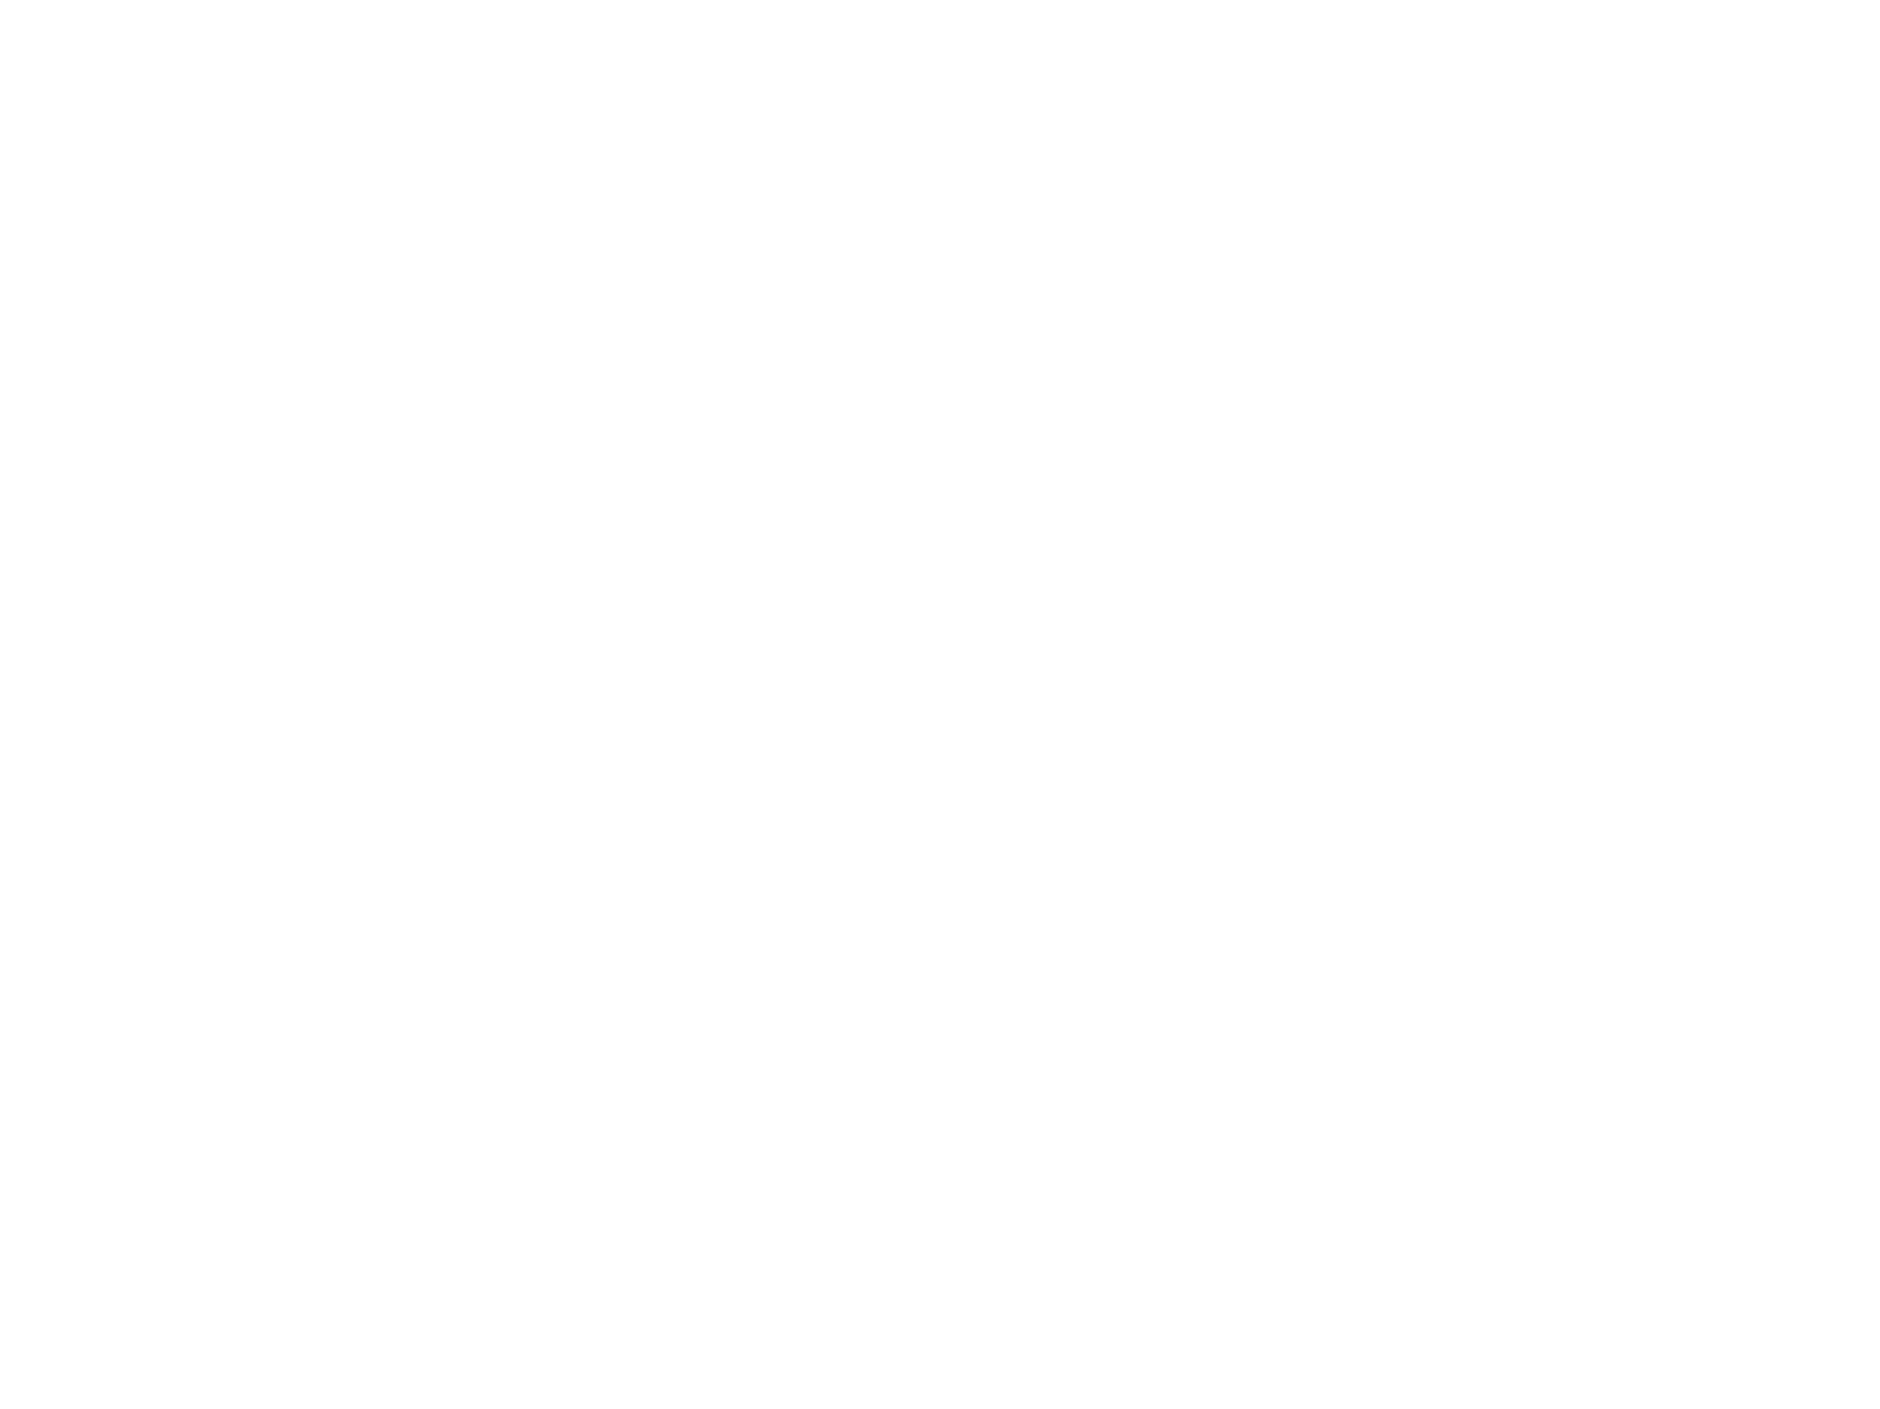

Simulation time 29.86s 


In [6]:
## Single grafted chain
chainLength = 32
n_sample = 10
t_equil = 10000
t_sample = 200

start=time.process_time()
helmut = createBrush(144,chainLength,1)
helmut.performMCS(t_equil,True)

hmean = 0
counter = 0
for n in range(n_sample):
    helmut.performMCS(t_sample,False)
    sepMol = bfm.separateMolecules(helmut.molecules)
    curenth = np.sum([m[-1].coords[2] for m in sepMol]) / len(sepMol)
    if n%10 == 0:
        if counter==0:
            cnt = 1
        else:
            cnt = 1.0*counter
        print("single chain", n*100+t_equil, curenth, hmean/cnt, sepMol[0][-1].coords)

    if n > (0.2*n_sample):
        hmean+=curenth
        counter+=1
#myH[i] = hmean/counter
helmut.plotConfig()
singleChainHight = hmean/counter
print("Simulation time {0:.2f}s ".format( time.process_time()-start ))

<IPython.core.display.Javascript object>


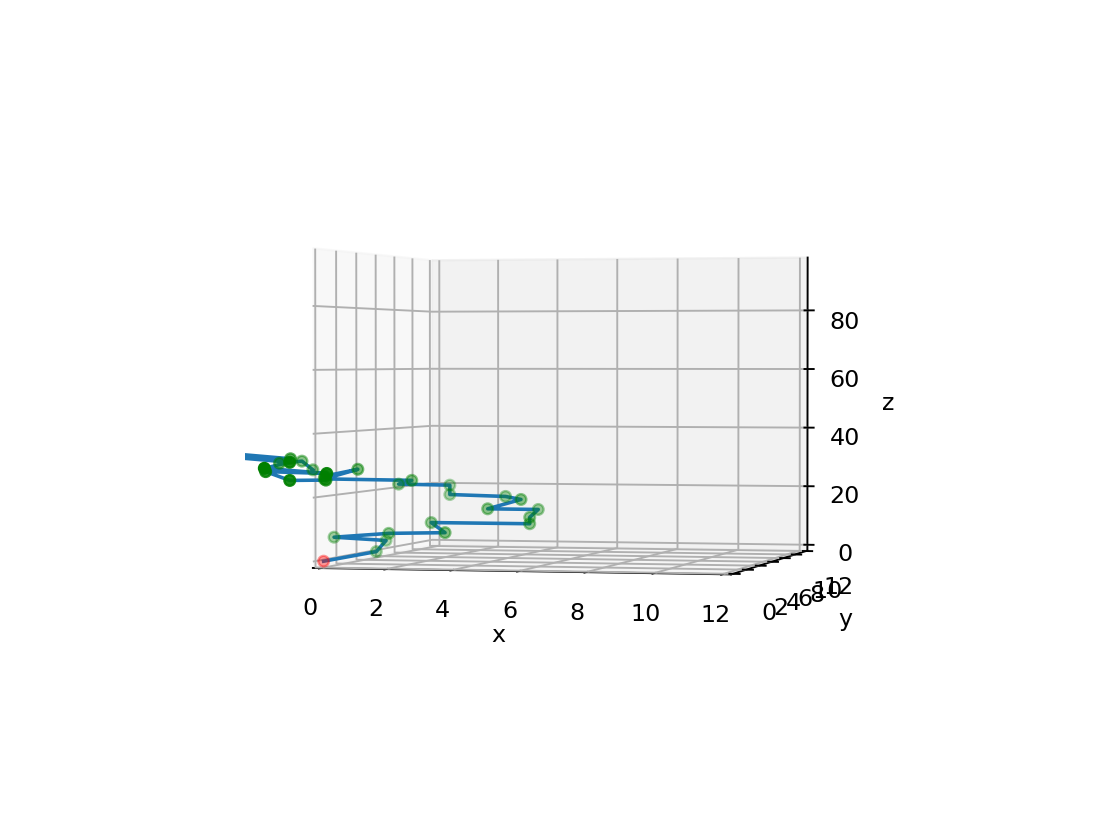

35.285714285714285


In [8]:
helmut.plotConfig()
print(singleChainHight)

In [ ]:
# brush of array 5x5
invGraftingDens = np.array([9,25,36,64,144])
chainLength = 32
n_sample = 100
myH = np.zeros((len(invGraftingDens)))
t_equil = 6000
t_sample = 200
# 5x5 ketten bilden Bürste
numChainsPerDimensions = 5

for i,sig in enumerate(invGraftingDens):
    helmut = createBrush(sig,chainLength,numChainsPerDimensions)
    helmut.performMCS(t_equil,True)
    
    hmean = 0
    counter = 0
    for n in range(n_sample):
        helmut.performMCS(t_sample,False)
        sepMol = bfm.separateMolecules(helmut.molecules)
        curenth = np.sum([m[-1].coords[-1] for m in sepMol]) / len(sepMol)
        if n%10 == 0:
            if counter==0:
                cnt = 1
            else:
                cnt = 1.0*counter
            print(sig,1/sig, n*100+t_equil, curenth, hmean/cnt)
            
        if n > (0.25*n_sample):
            hmean+=curenth
            counter+=1
    myH[i] = hmean/counter
    helmut.plotConfig()
    
data = np.vstack((invGraftingDens,myH))

9 3 15
applied moves / attempted moves:
816343 / 4800000 = 0.17007145833333334
9 0.1111111111111111 6000 57.28 0.0
9 0.1111111111111111 7000 56.12 0.0
9 0.1111111111111111 8000 56.16 0.0
9 0.1111111111111111 9000 55.84 56.23
9 0.1111111111111111 10000 55.84 55.72285714285715
9 0.1111111111111111 11000 54.56 55.50166666666667
9 0.1111111111111111 12000 54.12 55.30823529411765
9 0.1111111111111111 13000 53.6 54.969090909090916
9 0.1111111111111111 14000 53.12 54.69703703703704
9 0.1111111111111111 15000 52.88 54.395624999999995


<IPython.core.display.Javascript object>

25 5 25
applied moves / attempted moves:
1138072 / 4800000 = 0.23709833333333333
25 0.04 6000 45.48 0.0
25 0.04 7000 44.32 0.0
25 0.04 8000 41.4 0.0
25 0.04 9000 40.0 40.040000000000006
25 0.04 10000 40.16 39.86
25 0.04 11000 39.08 39.61666666666666
25 0.04 12000 37.36 39.31529411764705
25 0.04 13000 35.28 38.713636363636354
25 0.04 14000 34.96 38.179259259259254
25 0.04 15000 33.32 37.69562500000001


<IPython.core.display.Javascript object>

36 6 30
applied moves / attempted moves:
1155500 / 4800000 = 0.24072916666666666
36 0.027777777777777776 6000 45.6 0.0


<IPython.core.display.Javascript object>


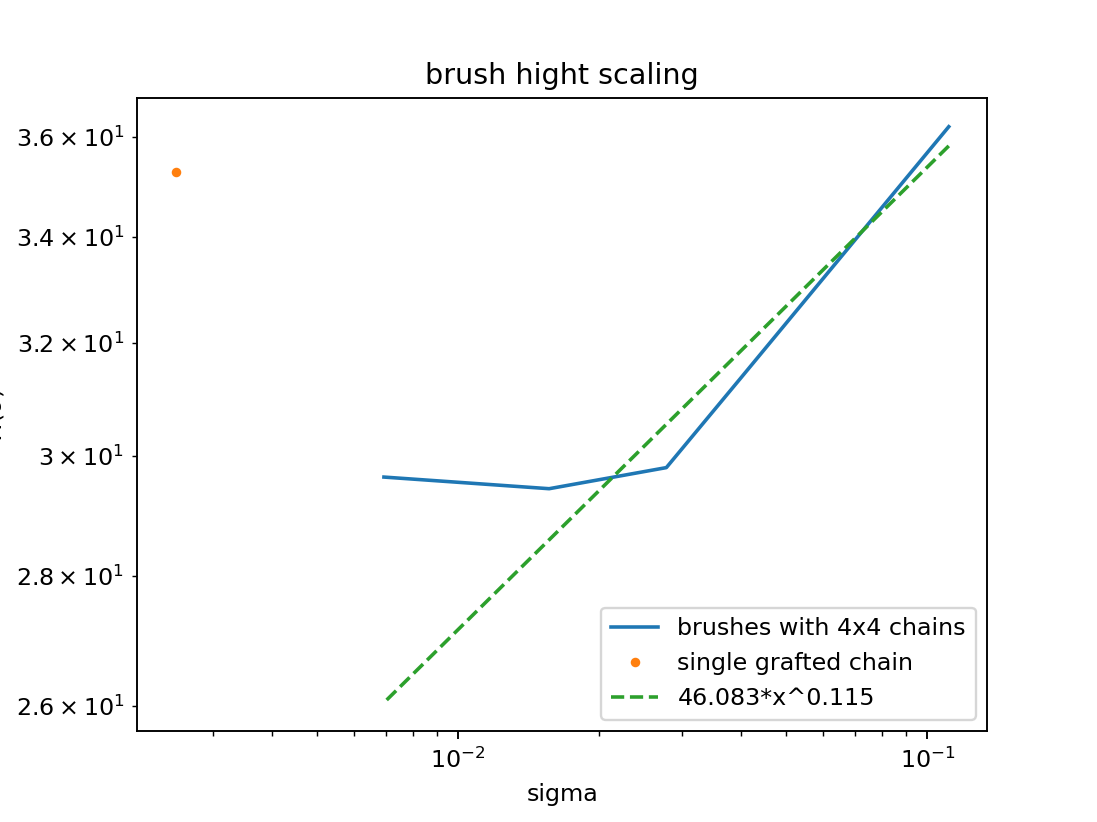

[ 9 25 36 64] [0.11111111 0.04       0.02777778 0.015625  ] [36.20535714 31.35714286 29.79464286 29.4375    ]
sigma = 1/144 is already in the mushroom regime :D, so better take 1/9,1/36,1/64 for a good fit
$H~ sigma^0.33: 46.083*x^0.115$


In [15]:
def power_law(x,a,b):
    return a*x**b
from scipy.optimize import curve_fit
figure()

plot(1/invGraftingDens,myH, label="brushes with {0}x{0} chains".format(numChainsPerDimensions))
plot(1/400, singleChainHight,".", label="single grafted chain")

fit_params, covar = curve_fit(power_law, (1/invGraftingDens)[:-1], myH[:-1])
x = np.logspace(np.log10(1/invGraftingDens[0]),np.log10(1/invGraftingDens[-1]),num=20)
plot(x,power_law(x,*fit_params),"--",label="{0:.3f}*x^{1:.3f}".format(fit_params[0],fit_params[1]))

legend()

xlabel("sigma")
ylabel(r"$H(\sigma)$")
title("brush hight scaling")
xscale("log")
yscale("log")

show()

print(invGraftingDens[:-1],(1/invGraftingDens)[:-1], myH[:-1])
print("sigma = 1/144 is already in the mushroom regime :D, so better take 1/9,1/36,1/64 for a good fit")
print(r'$H~ sigma^0.33: {0:.3f}*x^{1:.3f}$'.format(fit_params[0],fit_params[1]))